In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graspologic.simulations import sbm
from graspologic.plot import adjplot, matrixplot
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# team A
nodes = ["M1", "M2", "M3", "S1", "S2", "S3", "S4"]
edges = [
    ("M1", "M2"),
    ("M2", "M3"),
    ("M1", "M3"),
    ("M1", "S1"),
    ("M1", "S2"),
    ("M2", "S3"),
    ("M3", "S4"),
]
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

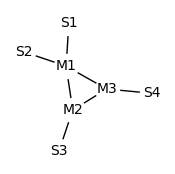

In [16]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)
pos = nx.spring_layout(g)
nx.draw(g, ax=ax, with_labels=True, pos=pos, node_color="white", font_size="10")
plt.savefig("images/team_a.pgf", bbox_inches="tight", pad_inches=0)

In [21]:
# team B
nodes = ["M1", "M2", "M3", "S1", "S2", "S3", "S4"]
edges = [
    ("M1", "M2"),
    ("M2", "M3"),
    ("M1", "M3"),
    ("M1", "S1"),
    ("M1", "S2"),
    ("M2", "S3"),
    ("M3", "S4"),
    ("S1", "S2"),
    ("S1", "S3"),
    ("S1", "M2"),
    ("S1", "M3"),
    ("S2", "S3"),
    ("S2", "M2"),
    ("S2", "M3"),
    ("S3", "M1"),
    ("S3", "M2"),
    ("S4", "S3"),
    ("S4", "S1"),
    ("S4", "S2"),
    ("S4", "S3"),
    ("S4", "M2"),
]
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

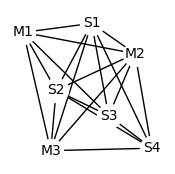

In [22]:
fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)
pos = nx.spring_layout(g)
nx.draw(g, ax=ax, with_labels=True, pos=pos, node_color="white", font_size="10")
plt.savefig("images/team_b.pgf", bbox_inches="tight", pad_inches=0)

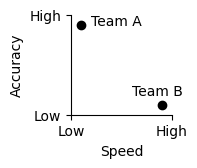

In [43]:
# team A vs B 
fig = plt.figure(figsize=(1.3,1.3))
ax = fig.add_subplot(111)
ax.scatter([0.9, 0.1], [0.1, 0.9], color="k")
ax.set_xlabel("Speed")
ax.set_ylabel("Accuracy")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Low", "High"])
ax.set_yticks([0, 1])
ax.set_yticklabels(["Low", "High"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.text(0.2, 0.9, "Team A")
ax.text(0.6, 0.2, "Team B")
plt.savefig("images/team_comparison.pgf", bbox_inches="tight")

In [84]:
# simulate a cp network
n_communities = [100, 1900]
p = [[0.75, 0.01],
     [0.01, 0.00]]

np.random.seed(2)
A = sbm(n_communities, p)

In [85]:
A

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

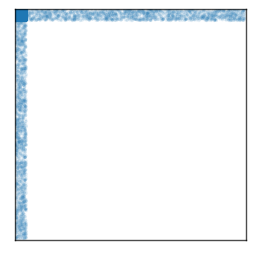

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
adjplot(
    data=A,
    ax=ax,
    plot_type="scattermap",
    alpha=0.1,
)
plt.savefig('images/blockmodel.pdf', bbox_inches='tight', pad_inches=0)

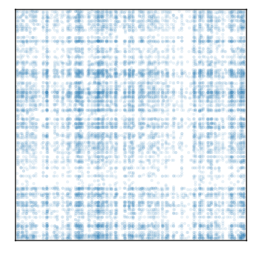

In [87]:
rnd_idx = np.arange(2000)
np.random.shuffle(rnd_idx)
A = A[np.ix_(rnd_idx, rnd_idx)]
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
adjplot(
    data=A,
    ax=ax,
    plot_type="scattermap",
    alpha=0.1,
)
plt.savefig('images/random.pdf', bbox_inches='tight', pad_inches=0)

In [104]:
g = nx.from_numpy_array(A)
g = nx.subgraph(g, max(nx.connected_components(g), key=len))


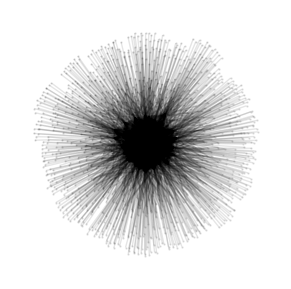

In [110]:
pos = nx.kamada_kawai_layout(g)
fig = plt.figure(figsize=(3.5, 3.5))
ax = fig.add_subplot(111)
nx.draw(g, node_color="k", alpha=0.1, ax=ax, node_size=0.5, with_labels=False)
plt.savefig("images/cp_net.pgf", bbox_inches="tight", pad_inches=0)

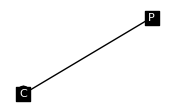

In [246]:
g = nx.Graph()
g.add_node("C")
g.add_node("P")
g.add_edge("C", "P")
g.add_edge("C", "C")
pos = {"C": (0, 0), "P": (1, 1)}
fig = plt.figure(figsize=(2,1.2))
ax = fig.add_subplot(111)
nx.draw(
    g,
    pos=pos,
    with_labels=True,
    node_color="k",
    node_shape="s",
    font_color="w",
    node_size=100,
    font_size=8,
    ax=ax,
)
# ax.text(1, 0.8, "C: core node; P: peripheral node")
plt.savefig("images/reduce_form.pgf", bbox_inches="tight")
